# Bayesian Statistical Inference

G. Richards, 2016 (with input from Ivezic $\S5$, Bevington, Karen Leighly's [Bayesian Stats](http://seminar.ouml.org/lectures/bayesian-statistics/) and [MCMC](http://seminar.ouml.org/lectures/monte-carlo-markov-chain-mcmc/) lectures, and [Thomas Wiecki](http://twiecki.github.io/blog/2015/11/10/mcmc-sampling/).)

Up to now we have been using Classical Inference: finding model parameters that maximize the
**likelihood** $p(D|M)$.

In Bayesian inference, the argument is that probability statements can be made not just for data, but also models and model parameters.  As a result, we instead evaluate the **posterior probability** taking into account **prior** information.

Recall from the BasicStats lecture that Bayes' Rule is:
$$p(M|D) = \frac{p(D|M)p(M)}{p(D)},$$
where $D$ is for data and $M$ is for model.

We wrote this in words as:
$${\rm Posterior Probability} = \frac{{\rm Likelihood}\times{\rm Prior}}{{\rm Evidence}}.$$

If we explicitly recognize prior information, $I$, and the model parameters, $\theta$, then we can write:
$$p(M,\theta|D,I) = \frac{p(D|M,\theta,I)p(M,\theta|I)}{p(D|I)},$$
where we will omit the explict dependence on $\theta$ by writing $M$ instead of $M,\theta$ where appropriate.  However, as the prior can be expanded to 
$$p(M,\theta|I) = p(\theta|M,I)p(M|I),$$
it will still appear in the term $p(\theta|M,I)$.

Note that it is often that case that $p(D|I)$ is not evaluated explictly since the likelihood can be normalized such that it is unity or we will instead take the ratio of two posterior probabilities such that this term cancels out.

## Analysis of a Heteroscedastic Gaussian distribution with Bayesian Priors

Consider the case of measuring a rod as we discussed previously.  We want to know the posterior pdf for the length of the rod, $p(M,\theta|D,I) = p(\mu|\{x_i\},\{\sigma_i\},I)$.

For the likelihood we have
$$L = p(\{x_i\}|\mu,I) = \prod_{i=1}^N \frac{1}{\sigma_i\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma_i^2}\right).$$

In the Bayesian case, we also need a prior.  We'll adopt a uniform distribution given by
$$p(\mu|I) = C, \; {\rm for} \; \mu_{\rm min} < \mu < \mu_{\rm max},$$
where $C = \frac{1}{\mu_{\rm max} - \mu_{\rm min}}$ between the min and max and is $0$ otherwise.

The log of the posterior pdf is then
$$\ln L = {\rm constant} - \sum_{i=1}^N \frac{(x_i - \mu)^2}{2\sigma_i^2}.$$

This is exactly the same as we saw before, except that the value of the constant is different.  Since the constant doesn't come into play, we get the same result as before:
 
$$\mu^0 = \frac{\sum_i^N (x_i/\sigma_i^2)}{\sum_i^N (1/\sigma_i^2)},$$
with uncertainty
$$\sigma_{\mu} = \left( \sum_{i=1}^N \frac{1}{\sigma_i^2}\right)^{-1/2}.$$

We get the same result because we used a flat prior.  If the case were homoscedastic instead of heteroscedastic, we obviously would get the result from our first example.

Now let's consider the case where $\sigma$ is *not* known, but rather needs to be determined from the data.  In that case, the posterior pdf that we seek is not $p(\mu|\{x_i\},\{\sigma_i\},I)$, but rather $p(\mu,\sigma|\{x_i\},I)$.

As before we have
$$L = p(\{x_i\}|\mu,\sigma,I) = \prod_{i=1}^N \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma^2}\right),$$
except that now $\sigma$ is uknown.

Our Bayesian prior is now 2D instead of 1D and we'll adopt 
$$p(\mu,\sigma|I) \propto \frac{1}{\sigma},\; {\rm for} \; \mu_{\rm min} < \mu < \mu_{\rm max} \; {\rm and} \; \sigma_{\rm min} < \sigma < \sigma_{\rm max}.$$

With proper normalization, we have
$$p(\{x_i\}|\mu,\sigma,I)p(\mu,\sigma|I) = C\frac{1}{\sigma^{(N+1)}}\prod_{i=1}^N \exp\left( \frac{-(x_i-\mu)^2}{2\sigma^2}  \right),$$
where
$$C = (2\pi)^{-N/2}(\mu_{\rm max}-\mu_{\rm min})^{-1} \left[\ln \left( \frac{\sigma_{\rm max}}{\sigma_{\rm min}}\right) \right]^{-1}.$$

The log of the posterior pdf is

$$\ln[p(\mu,\sigma|\{x_i\},I)] = {\rm constant} - (N+1)\ln\sigma - \sum_{i=1}^N \frac{(x_i - \mu)^2}{2\sigma^2}.$$

Right now that has $x_i$ in it, which isn't that helpful, but since we are assuming a Gaussian distribution, we can take advantage of the fact that the mean, $\overline{x}$, and the variance, $V (=s^2)$, completely characterize the distribution.  So we can write this expression in terms of those variables instead of $x_i$.  Skipping over the math details (see Ivezic $\S$5.6.1), we find

$$\ln[p(\mu,\sigma|\{x_i\},I)] = {\rm constant} - (N+1)\ln\sigma - \frac{N}{2\sigma^2}\left( (\overline{x}-\mu)^2 + V  \right).$$

Note that this expression only contains the 2 parameters that we are trying to determine: $(\mu,\sigma)$ and 3 values that we can determine directly from the data: $(N,\overline{x},V)$.

Load and execute the next cell to visualize the posterior pdf for the case of $(N,\overline{x},V)=(10,1,4)$.  Remember to change `usetex=True` to `usetex=False` if you have trouble with the plotting.  Try changing the values of $(N,\overline{x},V)$.

In [1]:
# %load code/fig_likelihood_gaussian.py
"""
Log-likelihood for Gaussian Distribution
----------------------------------------
Figure5.4
An illustration of the logarithm of the posterior probability density
function for :math:`\mu` and :math:`\sigma`, :math:`L_p(\mu,\sigma)`
(see eq. 5.58) for data drawn from a Gaussian distribution and N = 10, x = 1,
and V = 4. The maximum of :math:`L_p` is renormalized to 0, and color coded as
shown in the legend. The maximum value of :math:`L_p` is at :math:`\mu_0 = 1.0`
and :math:`\sigma_0 = 1.8`. The contours enclose the regions that contain
0.683, 0.955, and 0.997 of the cumulative (integrated) posterior probability.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from astroML.plotting.mcmc import convert_to_stdev

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)


def gauss_logL(xbar, V, n, sigma, mu):
    """Equation 5.57: gaussian likelihood"""
    return (-(n + 1) * np.log(sigma)
            - 0.5 * n * ((xbar - mu) ** 2 + V) / sigma ** 2)

#------------------------------------------------------------
# Define the grid and compute logL
sigma = np.linspace(1, 5, 70)
mu = np.linspace(-3, 5, 70)
xbar = 6
V = 300
n = 100

logL = gauss_logL(xbar, V, n, sigma[:, np.newaxis], mu)
logL -= logL.max()

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 3.75))
plt.imshow(logL, origin='lower',
           extent=(mu[0], mu[-1], sigma[0], sigma[-1]),
           cmap=plt.cm.binary,
           aspect='auto')
plt.colorbar().set_label(r'$\log(L)$')
plt.clim(-5, 0)

plt.contour(mu, sigma, convert_to_stdev(logL),
            levels=(0.683, 0.955, 0.997),
            colors='k')

plt.text(0.5, 0.93, r'$L(\mu,\sigma)\ \mathrm{for}\ \bar{x}=1,\ V=4,\ n=10$',
         bbox=dict(ec='k', fc='w', alpha=0.9),
         ha='center', va='center', transform=plt.gca().transAxes)

plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')

plt.show()


/home/vbaker/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


The shaded region is the posterior probability.  The contours are the confidence intervals.  We can compute those by determining the marginal distribution at each $(\mu,\sigma)$.  The top panels of the figures below show those marginal distributions.  The solid line is what we just computed.  The dotted line is what we would have gotten for a uniform prior--not that much difference.  The dashed line is the MLE result, which is quite different.  The bottom panels show the cumulative distribution.

![Ivezic, Figure 5.5](http://www.astroml.org/_images/fig_posterior_gaussian_1.png)


Note that the marginal pdfs follow a Student's $t$ Distribution, which becomes Gaussian for large $N$.

### Recap

To review: the Bayesian Statistical Inference process is
* formulate the likelihood, $p(D|M,I)$
* chose a prior, $p(\theta|M,I)$, which incorporates other information beyond the data in $D$
* determine the posterior pdf, $p(M|D,I)$
* search for the model paramters that maximize $p(M|D,I)$
* quantify the uncertainty of the model parameter estimates
* test the hypothesis being addressed

The last part we haven't talked about yet.

### Another Example

What if we wanted to model the mixture of a Gauassian distribution with a uniform distribution.  When might that be useful?  Well, for example:

![Atlas Higgs Boson Example](http://www.atlasexperiment.org/photos/atlas_photos/selected-photos/plots/fig_02.png)

Obviously this isn't exactly a Gaussian and a uniform distribution, but a line feature superimposed upon a background is the sort of thing that a physicist might see and is pretty close to this case for a local region around the feature of interest.  This is the example discussed in Ivezic $\S$5.6.5.

For this example, we will assume that the location parameter, $\mu$, is known (say from theory) and that the errors in $x_i$ are negligible compared to $\sigma$.

The likelihood of obtaining a measurement, $x_i$, in this example can be written as
$$L = p(x_i|A,\mu,\sigma,I) = \frac{A}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma^2}\right) + \frac{1-A}{W}.$$

Here the background probability is evaluated over $0 < x < W$ and 0 otherwise, that is the feature of interest lies between $0$ and $W$.  $A$ and $1-A$ are the relative strengths of the two components, which are obviously anti-correlated.  Note that there will be covariance between $A$ and $\sigma$.  

If we adopt a uniform prior in both $A$ and $\sigma$:
$$p(A,\sigma|I) = C, \; {\rm for} \; 0\le A<A_{\rm max} \; {\rm and} \; 0 \le \sigma \le \sigma_{\rm max},$$
then the posterior pdf is given by
$$\ln [p(A,\sigma|\{x_i\},\mu,W)] = \sum_{i=1}^N \ln \left[\frac{A}{\sigma \sqrt{2\pi}} \exp\left( \frac{-(x_i-\mu)^2}{2\sigma^2} \right)  + \frac{1-A}{W} \right].$$

The figure below (Ivezic, 5.13) shows an example for $N=200, A=0.5, \sigma=1, \mu=5, W=10$.  Specifically, the bottom panel is a result drawn from this distribution and the top panel is the likelihood distribution derived from the data in the bottom panel.
![Ivezic, Figure 5.13](http://www.astroml.org/_images/fig_likelihood_gausslin_1.png)

A more realistic example might be one where all three parameters are unknown: the location, the width, and the background level.  But that will have to wait until $\S$5.8.6.

In the meantime, note that we have not binned the data, $\{x_i\}$.  We only binned Figure 5.13 for the sake of visualizaiton.  However, sometimes the data are inherently binned (e.g., the detector is pixelated).  In that case, the data would be in the form of $(x_i,y_i)$, where $y_i$ is the number of counts at each location.  We'll skip over this example, but you can read about it in Ivezic $\S$5.6.6.  A refresher on the Poission distribution (Ivezic $\S$3.3.4) might be appropriate first.

### Model Comparison

Up to now we have concerned ourselves with determining the optimal parameters of a given model fit.  But what if *another* model would be a better fit (regardless of how you choose the parameters of the first model).  

That leads us to a discussion of model comparison.  This is discussed in more detail in Ivezic $\S$5.4 and $\S$5.7.1-3.

To determine which model is better we compute the ratio of the posterior probabilities or the **odds ratio** for two models as
$$O_{21} \equiv \frac{p(M_2|D,I)}{p(M_1|D,I)}.$$

Since 
$$p(M|D,I) = \frac{p(D|M,I)p(M|I)}{p(D|I)},$$
the odds ratio can ignore $p(D|I)$ since it  will be the same for both models.  

(We'll see later why that is even more important than you might think as the denominator is the integral of the numerator, but what if you don't have an analytical function that you can integrate?!)

### Bayesian Hypothesis Testing

In *hypothesis testing* we are essentially comparing a model, $M_1$, to its complement.  That is $p(M_1) + p(M_2) = 1$.  If we take $M_1$ to be the "null" (default) hypothesis (which is generally that, for example, a correlation does *not* exist), then we are asking whether or not the data reject the null hypothesis.

In classical hypothesis testing we can ask whether or not a single model provides a good description of the data.  In Bayesian hypothesis testing, we need to have an alternative model to compare to.

## Markov-Chain Monte Carlo Methods

Figure 5.10 from Ivezic shows the likelihood for a particular example:
![Ivezic, Figure 5.10](http://www.astroml.org/_images/fig_likelihood_cauchy_1.png)

What was required to produce this figure? We needed to know the analytic form of the posterior distribution. But imagine that you don’t have a nice analytical function for the likelihood. You could still make a plot like the one above, by making a simulated model for the likelihood at every point, comparing the model with the data to generate a likelihood, populating the grid with those numerical likelihood estimates, then finding the best fitting parameters by locating the maximum in likelihood space.

Now imagine that you have a problem with many parameters.  If you have even 5 parameters and you want to sample 100 points of parameter space for each, that is $10^{10}$ points.  It might take you a while (even your computer).  So you might not be able to sample the full space given time (and memory) constraints.

You *could* simply randomly sample the grid at every point, and try to find the minimum based on that. But that can also be quite time consuming, and you will spend a lot of time in regions of parameter space that yields small likelihood.

However, a better way is to adopt a **Markov-Chain Monte Carlo (MCMC)**.  MCMC gives us a way to make this problem computationally tractable by sampling the full multi-dimensional parameter space, in a way that builds up the most density in the regions of parameter space which are closest to the maximum.  Then, you can post-process the “chain” to infer the distribution and error regions.

Ivezic, Figure 5.22 shows the same problem as  above, done with a Markov Chain Monte Carlo.  The dashed lines are the known (analytic) solution.  The solid lines are from the MCMC estimate with 10,000 sample points.
![Ivezic, Figure 5.10](http://www.astroml.org/_images/fig_cauchy_mcmc_1.png)


## How does MCMC work?

I've really struggled to come up with a simple way of illustrating MCMC so that you (and I for that matter) can understand it.  Unfortunately, even the supposedly dumbed-down explanations are really technical.   But let's see what I can do!  

Let's start by simply trying to understand what a Monte Carlo is and what a Markov Chain is.

### What is a Monte Carlo?

In case you are not familiar with Monte Carlo methods, it might help to know that the term is derived from the Monte Carlo Casino as gambling and random sampling go together.

We'll consider a simple example: you have forgotten the formula for the area of a circle, but you know the formula for the area of a square and how to draw a circle.  

We can use the information that we *do* know to numerically compute the area of a circle.

We start by drawing a square and circumscribing a circle in it.  Then we put down random points within the square and note which ones land in the circle.  The ratio of random points in the circle to the number of random points drawn is related to the area of our circle.  No need to know $\pi$.  Using more random points yields more precise estimates of the area.

Try it.

0.3136


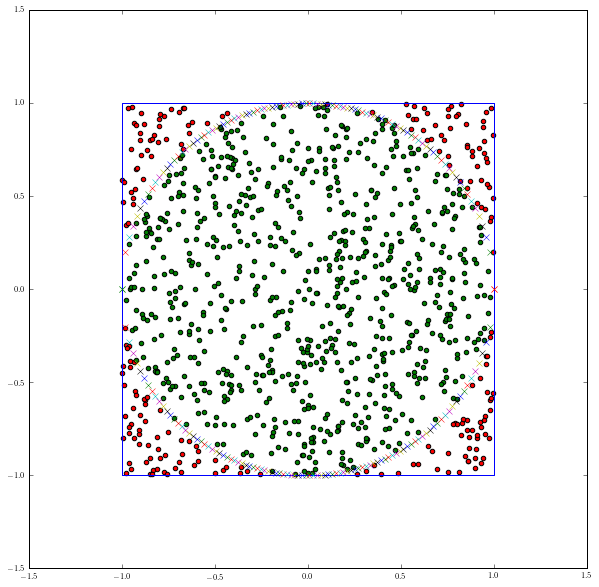

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))

#Draw a square that spans ([-1,1],[-1,1])
x = np.array([-1, -1, 1, 1,-1]) # Complete
y = np.array([-1, 1, 1, -1,-1]) # Complete
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.plot(x,y)

# Now draw a circle with radius = 1
u = np.linspace(-1,1,100)
# Top half of circle        
v = np.sqrt(1.0-u**2)
# Bottom half
v2 = -1.0*v
# Combine the top and bottom halves together
u = [u, u]# Complete
v = [v, v2]# Complete
plt.plot(u,v,'x')

# Uniformly sample between -1 and 1 in 2 dimensions.  Do this for 1000 draws
z = np.random.uniform(-1,1,size=(1000,2)) # Complete

# Now figure out how many of those draws are in the circle (all are in the square by definition)
n = 0
for a,b in z:
    if a*a+b*b < 1: # Complete
        plt.scatter(a,b,c='g')
        n=n+1
    else:
        plt.scatter(a,b,c='r')

# Use that information to compute the area of the circle (without using the formula)            
print 4*n/10000. # Complete


For homework plot the distribution of results for lots of such experiments.  Do you get the expected $\sigma$?


In general, Monte Carlo methods are about using random sampling to obtain a numerical result (e.g., the value of an integral), where there is no analytic result.

In the case of the circle above, we have computed the intergral:
$$\int\int_{x^2+y^2\le 1} dx dy.$$

### What is a Markov Chain?

A Markov Chain is defined as a sequence of random variables where a parameter depends *only* on the preceding value.  Such processes are "memoryless".  
 
Mathematically, we have
$$p(\theta_{i+1}|\{\theta_i\}) = p(\theta_{i+1}|\theta_i).$$

Now, if you are like me, you might look at that and say "Well, day 3 is based on day 2, which is based on day 1, so day 3 is based on day 1...".

So let's look at an example to see what we mean and how this might be a memoryless process.


Let's say that you are an astronomer and you want to know how likely it is going to be clear tomorrow night given the weather tonight (clear or cloudy).  From past history, you know that:

$$p({\rm clear \; tomorrow} \, |\,  {\rm cloudy \; today}) = 0.5,$$
which means that
$$p({\rm cloudy \; tomorrow} \, |\, {\rm cloudy \; today}) = 0.5.$$

We also have
$$p({\rm cloudy \; tomorrow} \, |\, {\rm clear \; today}) = 0.1,$$
which means that
$$p({\rm clear \; tomorrow} \, |\, {\rm clear \; today}) = 0.9.$$

(That is, you don't live in Philadelphia.)

We can start with the sky conditions today and make predictions going forward.  This will look like a big decision tree.  After enough days, we'll reach equilibrium probabilities that have to do with the mean weather statistics (ignoring seasons) and we'll arrive at

$$p({\rm clear}) = 0.83,$$
and 
$$p({\rm cloudy}) = 0.17.$$

You get the same answer for day $N$ as day $N+1$ and it doesn't matter whether is was clear to cloudy on the day that you started.    

The steps that we have taken in this process are a **Markov Chain**.

In MCMC the prior must be **stationary** which basically means that its looks the same no matter where you sample it.  

Obviously that isn't going to be the case in the early steps of the chain.  In our example above, after some time the process was stationary, but not in the first few days.

So, there is a **burn-in** phase that needs to be discarded.  How one determines how long many iterations the burn-in should last when you don't know the distribution can be a bit tricky.

## Markov Chain Monte Carlo Summary

1. Starting at a random position, evaluate the likelihood.
2. Choose a new position, according to some transition probabilities, and evaluate the likelihood there.
3. Examine the odds ratio formed by the new-position likelihood and the old-position likelihood. If the odds ratio is greater than 1, move to the new position.  If it is less than one, keep it under the following conditions: draw a random number between zero and 1.   If the odds ratio is smaller than the random number, keep it. If not, reject the new position.
4. Repeat 1-3 many times. After a period of time (the burn-in) the simulation should reach an equilibrium. Keep the results of the chain (after burn-in), and postprocess those results to infer the likelihood surface.


Most of the difficulty in the MCMC process comes from either determining the burn-in or deciding how to step from one position to another.  In our circle example we have drawn points in a completely random manner.  However, that may not be the most efficient manner to span the space.  

The most commonly used algorithm for stepping from one position to another is the [Metropolis-Hastings] (https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm) algorithm.  

In astronomy, the ${\tt emcee}$ algorithm has become more popular in recent years.  We won't discuss either in detail, but both the [code](http://dan.iel.fm/emcee/current/) and a [paper[(http://adsabs.harvard.edu/abs/2013PASP..125..306F) describing the ${\tt emcee}$ are available.

Recall that our parameter space it multidimensional.  So, when you are stepping from one point to another, you are really doing it in N-D parameter space!  You might wonder if you could just step one parameter at a time.  Sure!  That's what [Gibbs sampling](https://en.wikipedia.org/wiki/Gibbs_sampling) does.


Then end result of this process will be a chain of likelihoods that we can use to compute the likelihood contours.  

If you are using MCMC, then you probably have multiple paramters (otherwise, you'd be doing something easier).  So, it helps to display the parameters two at a time, marginalizing over the other parameters.  An example is given in Ivezic, Figure 5.24, which compares the model results for a single Gaussian fit to a double Gaussian fit:

![Ivezic, Figure 5.24](http://www.astroml.org/_images/fig_model_comparison_mcmc_1.png)

We'll end by going through the example given at
[http://twiecki.github.io/blog/2015/11/10/mcmc-sampling/](http://twiecki.github.io/blog/2015/11/10/mcmc-sampling/).

First set up some stuff by executing the next cell

In [1]:
%matplotlib inline

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(123)

/home/vbaker/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Now let's generate some data points and plot them.  We'll try a normal distribution, centered at 0 with 100 data points.  Our goal is to estimate $\mu$.

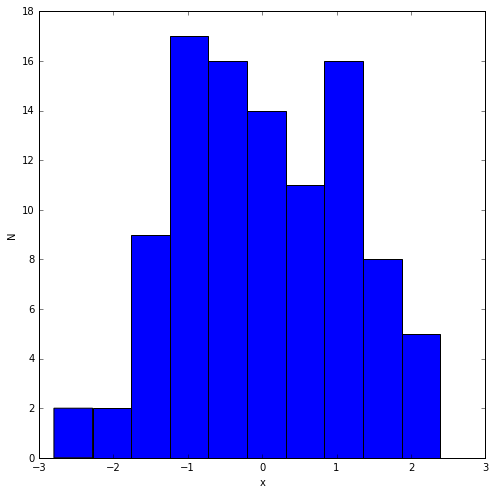

In [2]:
data = np.random.randn(100)
plt.figure(figsize=(8,8))
plt.hist(data)
plt.xlabel('x')
plt.ylabel('N')

Now we have to pick a model to try.  For the sake of simplicity for this example, we'll assume a normal distribution: $\mathscr{N}(\mu,\sigma=1)$ (i.e., with $\sigma=1$).  We'll also assume a normal distribution for the prior on $\mu$: $\mathscr{N}(0,1)$.

We can use that to write a function for our posterior distribution as follows:

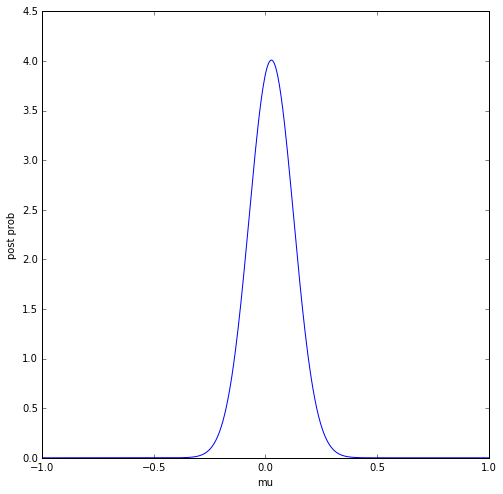

In [3]:
def calc_posterior_analytical(data, x, mu_0, sigma_0):
    sigma = 1.
    n = len(data)
    mu_post = (mu_0 / sigma_0**2 + data.sum() / sigma**2) / (1. / sigma_0**2 + n / sigma**2)
    sigma_post = (1. / sigma_0**2 + n / sigma**2)**-1
    return norm(mu_post, np.sqrt(sigma_post)).pdf(x)

plt.figure(figsize=(8,8))
x = np.linspace(-1, 1, 500)
posterior_analytical = calc_posterior_analytical(data, x, 0., 1.)
plt.plot(x, posterior_analytical)
plt.xlabel('mu')
plt.ylabel('post prob')

Now we need to sample the distribution space.  Let's start by trying $\mu_0 = 0$ and evaluate.

Then we'll jump to a new position using one of the algorithms mentioned above.  In this case we'll use the Metropolis algorithm, which draws the new points from a normal distribution centered on the current guess for $\mu$.

Next we evaluate whether that jump was "good" or not -- by seeing if the value of likelihood\*prior increases.  Now, we want to get the right answer, but we also want to make sure that we sample the full parameter space (so that we don't) get stuck in a local minimum.  So, even if the this location is not better than the last one, we'll have some probability of staying there anyway.  

The reason that taking the ratio of likelihood\*prior works is that the denominator drops out.  That's good because the denominator is the integral of the numerator and that's what we are trying to figure out!  In short, we don't have to know the posterior probability to know that the posterior probability at one step is better than another.

In [6]:
# Execute this cell
# See https://github.com/twiecki/WhileMyMCMCGentlySamples/blob/master/content/downloads/notebooks/MCMC-sampling-for-dummies.ipynb
def sampler(data, samples=4, mu_init=.5, proposal_width=.5, plot=False, mu_prior_mu=0, mu_prior_sd=1.):
    mu_current = mu_init
    posterior = [mu_current]
    for i in range(samples):
        # suggest new position
        mu_proposal = norm(mu_current, proposal_width).rvs()

        # Compute likelihood by multiplying probabilities of each data point
        likelihood_current = norm(mu_current, 1).pdf(data).prod()
        likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()
        
        # Compute prior probability of current and proposed mu        
        prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
        prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)
        
        p_current = likelihood_current * prior_current
        p_proposal = likelihood_proposal * prior_proposal
        
        # Accept proposal?
        p_accept = p_proposal / p_current
        
        # Usually would include prior probability, which we neglect here for simplicity
        accept = np.random.rand() < p_accept
        
        if plot:
            plot_proposal(mu_current, mu_proposal, mu_prior_mu, mu_prior_sd, data, accept, posterior, i)
        
        if accept:
            # Update position
            mu_current = mu_proposal
        
        posterior.append(mu_current)
        
    return posterior

# Function to display
def plot_proposal(mu_current, mu_proposal, mu_prior_mu, mu_prior_sd, data, accepted, trace, i):
    from copy import copy
    trace = copy(trace)
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(16, 4))
    fig.suptitle('Iteration %i' % (i + 1))
    x = np.linspace(-3, 3, 5000)
    color = 'g' if accepted else 'r'
        
    # Plot prior
    prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
    prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)
    prior = norm(mu_prior_mu, mu_prior_sd).pdf(x)
    ax1.plot(x, prior)
    ax1.plot([mu_current] * 2, [0, prior_current], marker='o', color='b')
    ax1.plot([mu_proposal] * 2, [0, prior_proposal], marker='o', color=color)
    ax1.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    ax1.set(ylabel='Probability Density', title='current: prior(mu=%.2f) = %.2f\nproposal: prior(mu=%.2f) = %.2f' % (mu_current, prior_current, mu_proposal, prior_proposal))
    
    # Likelihood
    likelihood_current = norm(mu_current, 1).pdf(data).prod()
    likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()
    y = norm(loc=mu_proposal, scale=1).pdf(x)
    #sns.distplot(data, kde=False, norm_hist=True, ax=ax2)
    ax2.hist(data,alpha=0.5,normed='True')
    ax2.plot(x, y, color=color)
    ax2.axvline(mu_current, color='b', linestyle='--', label='mu_current')
    ax2.axvline(mu_proposal, color=color, linestyle='--', label='mu_proposal')
    #ax2.title('Proposal {}'.format('accepted' if accepted else 'rejected'))
    ax2.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    ax2.set(title='likelihood(mu=%.2f) = %.2f\nlikelihood(mu=%.2f) = %.2f' % (mu_current, 1e14*likelihood_current, mu_proposal, 1e14*likelihood_proposal))
    
    # Posterior
    posterior_analytical = calc_posterior_analytical(data, x, mu_prior_mu, mu_prior_sd)
    ax3.plot(x, posterior_analytical)
    posterior_current = calc_posterior_analytical(data, mu_current, mu_prior_mu, mu_prior_sd)
    posterior_proposal = calc_posterior_analytical(data, mu_proposal, mu_prior_mu, mu_prior_sd)
    ax3.plot([mu_current] * 2, [0, posterior_current], marker='o', color='b')
    ax3.plot([mu_proposal] * 2, [0, posterior_proposal], marker='o', color=color)
    ax3.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    #x3.set(title=r'prior x likelihood $\propto$ posterior')
    ax3.set(title='posterior(mu=%.2f) = %.5f\nposterior(mu=%.2f) = %.5f' % (mu_current, posterior_current, mu_proposal, posterior_proposal))
    
    if accepted:
        trace.append(mu_proposal)
    else:
        trace.append(mu_current)
    ax4.plot(trace)
    ax4.set(xlabel='iteration', ylabel='mu', title='trace')
    plt.tight_layout()
    #plt.legend()

To visualize the sampling, we'll create plots for some quantities that are computed. Each row below is a single iteration through our Metropolis sampler.

The first column is our prior distribution -- what our belief about $\mu$ is before seeing the data. You can see how the distribution is static and we only plug in our $\mu$ proposals. The vertical lines represent our current $\mu$ in blue and our proposed $\mu$ in either red or green (rejected or accepted, respectively).

The 2nd column is our likelihood and what we are using to evaluate how good our model explains the data. You can see that the likelihood function changes in response to the proposed $\mu$. The blue histogram is our data. The solid line in green or red is the likelihood with the currently proposed mu. Intuitively, the more overlap there is between likelihood and data, the better the model explains the data and the higher the resulting probability will be. The dashed line of the same color is the proposed mu and the dashed blue line is the current mu.

The 3rd column is our posterior distribution. Here we are displaying the normalized posterior.

The 4th column is our trace (i.e. the posterior samples of $\mu$ we're generating) where we store each sample irrespective of whether it was accepted or rejected (in which case the line just stays constant).

Note that we always move to relatively more likely $\mu$ values (in terms of their posterior density), but only sometimes to relatively less likely $\mu$ values, as can be seen in iteration 14 (the iteration number can be found at the top center of each row).


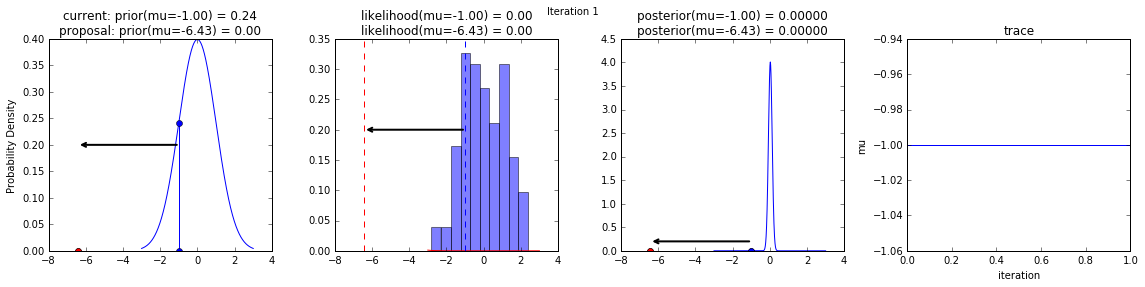

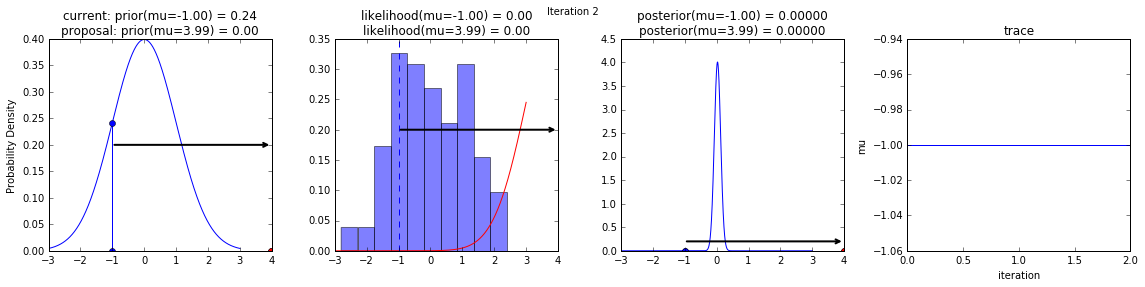

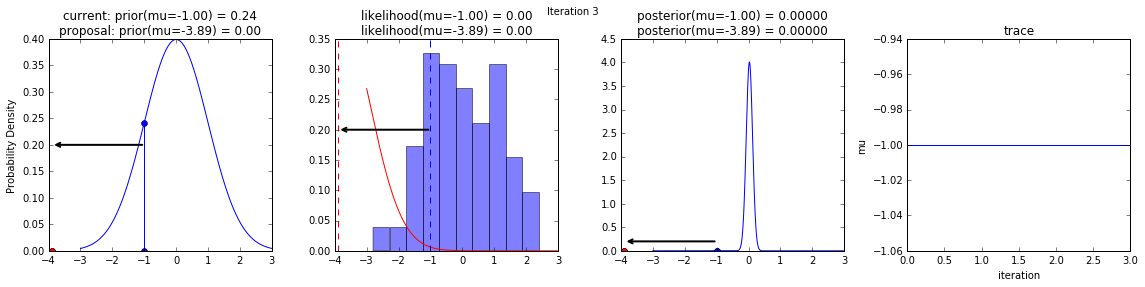

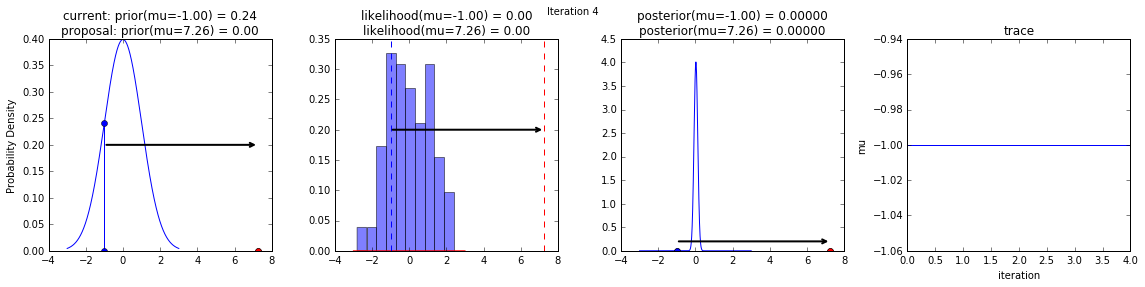

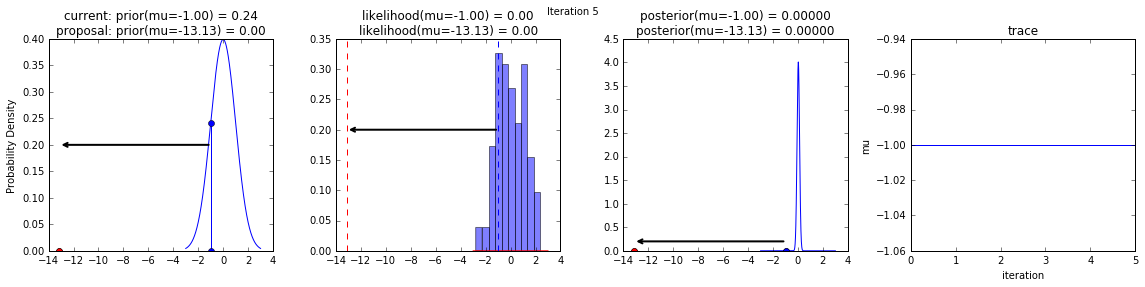

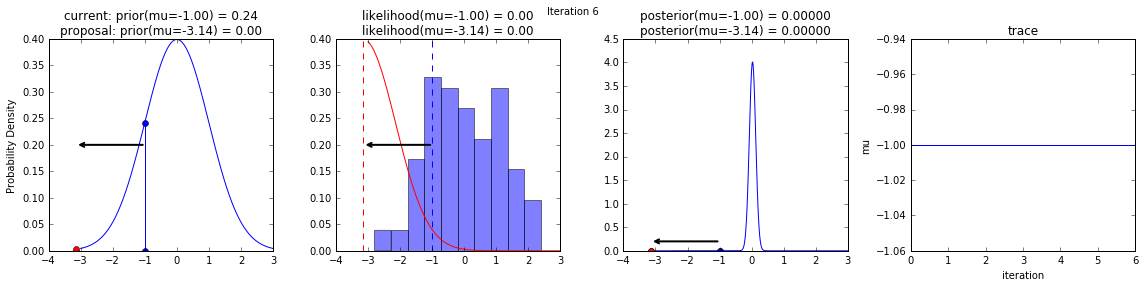

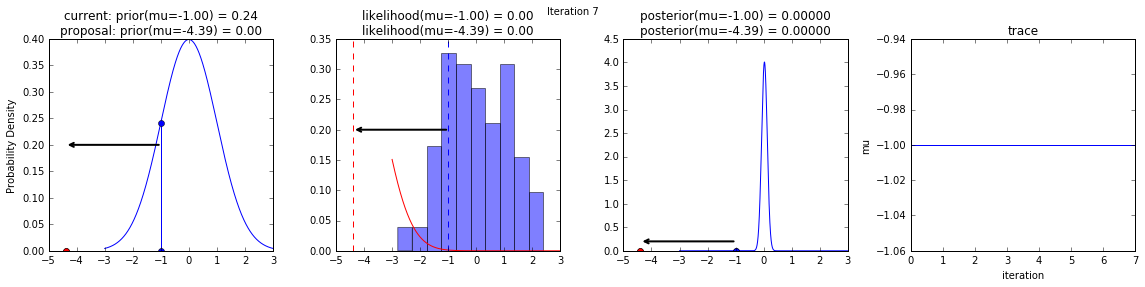

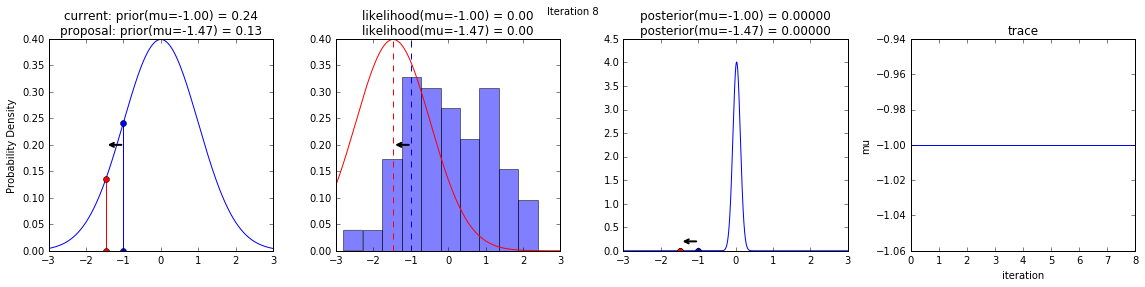

In [10]:
np.random.seed(123)
sampler(data, samples=8, mu_init=-1., proposal_width=5., plot=True);

What happens when we do this lots of times?

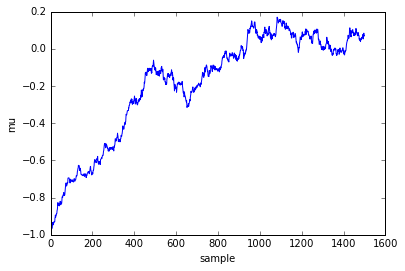

In [20]:
posterior = sampler(data, samples=1500, mu_init=-1., proposal_width=.01)
fig, ax = plt.subplots()
ax.plot(posterior)
_ = ax.set(xlabel='sample', ylabel='mu');

Making a histogram of these results is our estimated posterior probability distribution.

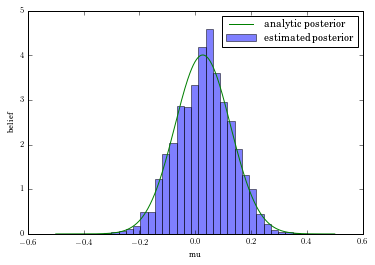

In [16]:
ax = plt.subplot()

ax.hist(posterior[500:],bins=30,alpha=0.5,normed='True',label='estimated posterior')
x = np.linspace(-.5, .5, 500)
post = calc_posterior_analytical(data, x, 0, 1)
ax.plot(x, post, 'g', label='analytic posterior')
_ = ax.set(xlabel='mu', ylabel='belief');
ax.legend(fontsize=10);

Our algorithm for deciding where to move to next used a normal distribution where the mean was the current value and we had to assume a width.  Find where we specified that and see what happens if you make it a lot smaller or a lot bigger.

### More Complex Models

The example above was overkill in that we were only trying to estmate $\mu$.  Note also that we can do this in less than 10 lines using the ${\tt pymc3}$ module.

The process is essentially the same when you add more parameters.  Check out this [animation of a 2-D process](http://twiecki.github.io/blog/2014/01/02/visualizing-mcmc/) by the same author whose example we just followed.